In [ ]:
from google.colab import files
ukloaded = files.upload()

Saving lap1.csv to lap1.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lap2.csv to lap2.csv


In [ ]:
from tensorflow import keras
from keras import layers
import io
import time
from keras.layers import LSTM , Bidirectional
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv(io.BytesIO(ukloaded['lap1.csv']))
data2=pd.read_csv(io.BytesIO(uploaded['lap2.csv']))

In [ ]:

v2vd=pd.concat([data1,data2],ignore_index=True)
nn=pd.DataFrame(v2vd.loc[13000:31000,[' Sender Speed(km/h)']])
from keras import metrics
m = keras.metrics.RootMeanSquaredError()
metrics1=[metrics.mae,metrics.mse,m]
metrics=metrics1
selected_features = [' Sender Speed(km/h)']

In [ ]:
dataset = nn[selected_features].values
# Scale the dataset between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data1 = dataset[:train_size]
test_data1 = dataset[train_size:]
train_data = scaler.fit_transform(train_data1)
test_data = scaler.transform(test_data1)
# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 15 # Length of input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
Adam=keras.optimizers.Adam(learning_rate=0.01)
# Build the LSTM mode

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(seq_length, 1)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))
model.compile(optimizer=Adam, loss=['mean_squared_error'],metrics=metrics1)

# Train the model
start = time.time()
history=model.fit(X_train, y_train, epochs=150, batch_size=32)
end = time.time()
total_time_Bilstm = end - start
print("Time for fitting Bilstm:   "+ str(total_time_Bilstm))
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Epoch 1/150
450/450 [==============================] - 23s 35ms/step - loss: 0.0239 - mean_absolute_error: 0.0348 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1117
Epoch 2/150
450/450 [==============================] - 18s 39ms/step - loss: 4.0774e-04 - mean_absolute_error: 0.0078 - mean_squared_error: 4.0774e-04 - root_mean_squared_error: 0.0202
Epoch 3/150
450/450 [==============================] - 23s 51ms/step - loss: 4.2572e-04 - mean_absolute_error: 0.0090 - mean_squared_error: 4.2572e-04 - root_mean_squared_error: 0.0206
Epoch 4/150
450/450 [==============================] - 17s 38ms/step - loss: 2.8151e-04 - mean_absolute_error: 0.0061 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0168
Epoch 5/150
450/450 [==============================] - 19s 42ms/step - loss: 1.8921e-04 - mean_absolute_error: 0.0044 - mean_squared_error: 1.8921e-04 - root_mean_squared_error: 0.0138
Epoch 6/150
450/450 [==============================] - 18s 41ms/step - loss: 2.4841

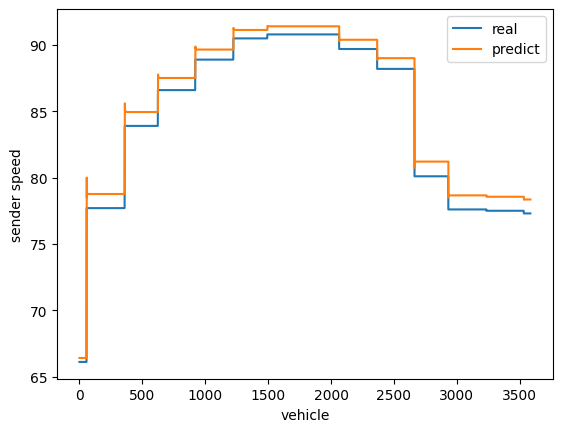

In [ ]:
close_predicted=scaler.inverse_transform(test_predictions).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

Text(0.5, 1.0, 'MAE for Bilstm')

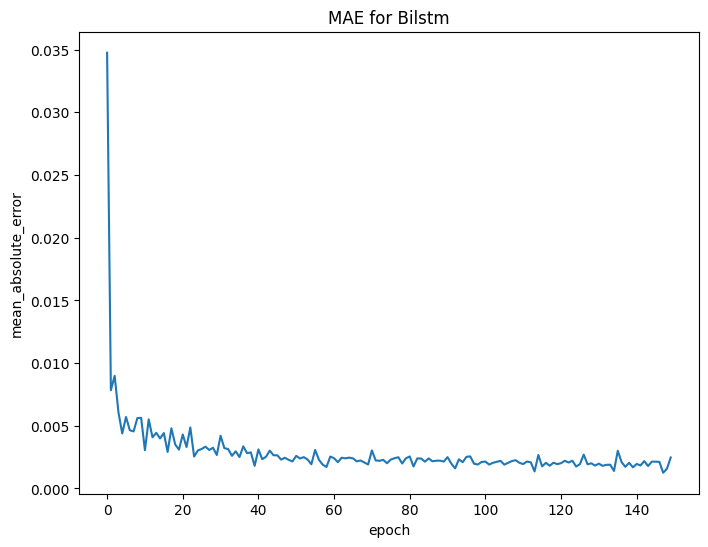

In [ ]:
import matplotlib.pyplot as plt
fig , ax =plt.subplots(figsize=(8,6))
ax.plot(history.history['mean_absolute_error'],label='mean_absolute_error')
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')
plt.title('MAE for Bilstm')